# Data Exploration and Visualisation with Pandas and Seaborn

***

Data wrangling, exploration, and visualisation with `pandas`, SC207 Social Data Science, Sociology, University of Essex, November 2021

## This Jupyter Notebook

In this notebook and lab, we will explore and visualise various features and patterns in the mobility trends data using the Python libraries `pandas` for data analysis and `Seaborn` for data visualisation. [`Seaborn`](https://seaborn.pydata.org/index.html) is a Python data visualisation library built on top of `matplotlib`. It provides an interface for drawing attractive and informative statistical graphics. 

[Getting started with `Seaborn`](https://seaborn.pydata.org/index.html)


<img src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" title='Pandas Logo' width="400" height="200"/>

## Visualising your data using `Seaborn`

We first import Python libraries for exploratory data analysis and visualisation.

In [1]:
# Import Python libbraries for visualisation and data analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() # Apply the default Seaborn theme

Let's load the mobility data.

In [2]:
# The code below loads the most recent online version of the data

mobility_trends = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv', parse_dates = ['date'])

# Pandas represents tabular data as a DataFrame
mobility_trends

/Applications/JupyterLab.app/Contents/Resources/jlab_server/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7551799,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-11-01,NaN,NaN,NaN,NaN,31.0,NaN
7551800,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-11-02,NaN,NaN,NaN,NaN,49.0,NaN
7551801,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-11-03,NaN,NaN,NaN,NaN,44.0,NaN
7551802,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-11-04,NaN,NaN,NaN,NaN,38.0,NaN


We would like to address the research question: 'How do countries differ in mobility trends?' To begin to analyse differences in mobility trends across countries, we first need to determine how countries are labeled in the data set, which we could do by typing 

In [3]:
mobility_trends.country_region.unique()

array(['United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda',
       'Angola', 'Argentina', 'Austria', 'Australia', 'Aruba',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Benin', 'Bolivia',
       'Brazil', 'The Bahamas', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Switzerland', "Côte d'Ivoire", 'Chile', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cape Verde', 'Czechia', 'Germany', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Estonia', 'Egypt', 'Spain',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Hong Kong',
       'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Ireland',
       'Israel', 'India', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait',
       'Kazakhstan', 'Laos', 'Lebanon', 'Liechtenstein', 'Sri Lanka',
       'Lithuania', '

We then select data about six countries of interest using the `isin()` method and passing a list `[]` of our six countries as an argument.  

In [4]:
# Access data about multiple countries 

mobility_trends_countries = mobility_trends[mobility_trends['country_region'].isin
                                                (['United Kingdom',
                                                  'Italy',
                                                  'France',
                                                  'Germany',
                                                  'Sweden',
                                                  'Spain'])]

mobility_trends_countries.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2417879,DE,Germany,NaN,NaN,NaN,NaN,NaN,ChIJa76xwh5ymkcRW-WRjmtd6HU,2020-02-15,6.0,1.0,45.0,10.0,0.0,-1.0
2417880,DE,Germany,NaN,NaN,NaN,NaN,NaN,ChIJa76xwh5ymkcRW-WRjmtd6HU,2020-02-16,7.0,10.0,9.0,6.0,-1.0,0.0
2417881,DE,Germany,NaN,NaN,NaN,NaN,NaN,ChIJa76xwh5ymkcRW-WRjmtd6HU,2020-02-17,2.0,2.0,7.0,1.0,-2.0,0.0
2417882,DE,Germany,NaN,NaN,NaN,NaN,NaN,ChIJa76xwh5ymkcRW-WRjmtd6HU,2020-02-18,2.0,2.0,10.0,1.0,-1.0,1.0
2417883,DE,Germany,NaN,NaN,NaN,NaN,NaN,ChIJa76xwh5ymkcRW-WRjmtd6HU,2020-02-19,3.0,0.0,6.0,-1.0,-1.0,1.0


### `Seaborn` functions for data visualisation

Let's first summarise one mobility category — for example, workplaces mobility — for the six selected countries using a box plot. In `seaborn`, we use the function [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) which displays the relationship between a numerical and one or more categorical variables using several visual representations, including bar plot, box plot, and violin plot. 

The `catplot` function has many parameters. You can access them by typing `sns.catplot?` in a code cell. These are the parameters we will need for our first plot:
* `x` — Categorical variable, in our case the variable "country_region" containing the labels of the six countries
* `y` — Numerical variable, in our case the variable "workplaces_percent_change_from_baseline"
* `data` — `pandas` DataFrame
* `kind` — The kind of plot to draw. Options are: "strip", "swarm", "box", "violin", "boxen", "point", "bar", or "count"
* `height` — Height (in inches) of the plot
* `aspect` — Aspect * height gives the width (in inches) of the plot

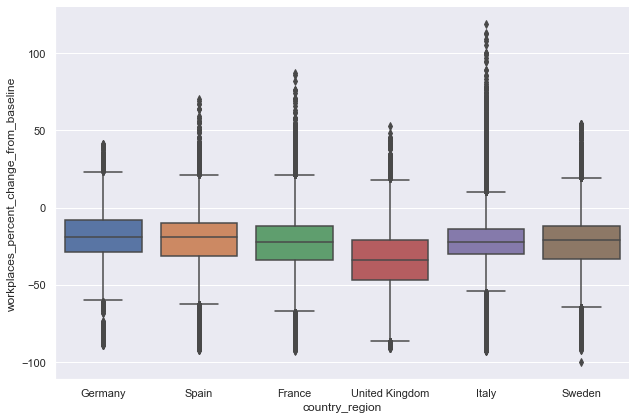

In [5]:
# Box plot of workplaces mobility trends in selected countries

sns.catplot(x="country_region",
            y="workplaces_percent_change_from_baseline",
            kind="box",
            data=mobility_trends_countries,
            height=6, aspect=1.5);

### Changing figure appearance

`Seaborn` provides a range of capabilities to change figure appearance. For example, the figure below set a theme that controls color, font, and other features. The `set_theme()` function applies globally to the entire notebook so you do not need to execute again the function unless you want to change the theme. We also change the y and x axes labels.

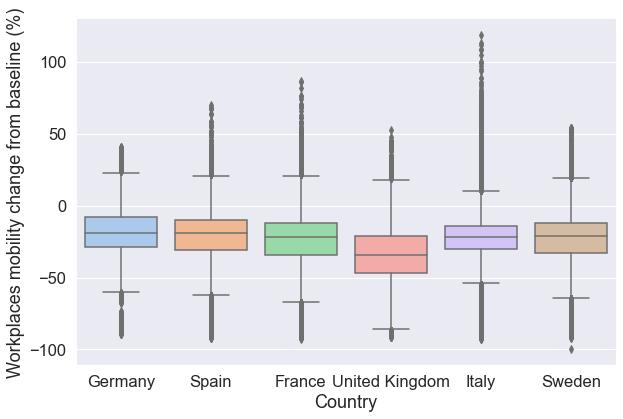

In [6]:
# Control the scale of plot elements, font
sns.set_theme(context='notebook', style="darkgrid", palette="pastel", font_scale=1.5)

grid = sns.catplot(x="country_region",
            y="workplaces_percent_change_from_baseline", 
            kind="box", 
            data=mobility_trends_countries,
            height=6, aspect=1.5)

# Change the labels of the two axes
grid.set(xlabel = "Country", ylabel = "Workplaces mobility change from baseline (%)");

You can access information about the `catplot` function by typing `sns.catplot?` 

In [7]:
sns.catplot?

Signature:
sns.catplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    row=None,
    col=None,
    col_wrap=None,
    estimator=<function mean at 0x7fc6783bb9d0>,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=None,
    hue_order=None,
    row_order=None,
    col_order=None,
    kind='strip',
    height=5,
    aspect=1,
    orient=None,
    color=None,
    palette=None,
    legend=True,
    legend_out=True,
    sharex=True,
    sharey=True,
    margin_titles=False,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing categorical plots onto a FacetGrid.

This function provides access to several axes-level functions that
show the relationship between a numerical and one or more categorical
variables using one of several visual representations. The ``kind``
parameter selects the underlying axes-level function to use:

Categorical scatterplots:

- :func:`stripplot` (with ``kind="strip"``; the default)
- :func:`swarmplot` (

> ## Try on your own—Exercise 1
Plot the workplaces mobility trends in selected countries as a bar plot.

In [8]:
# Please write the code related to Exercise 2 in this cell



### Exploratory data analysis — Mobility Trends in the UK

We first need to get all the rows about the United Kingdom and save it to its own variable. 

In [9]:
mobility_trends_UK = mobility_trends[mobility_trends['country_region'] == 'United Kingdom']
mobility_trends_UK

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2778830,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-15,-12.0,-7.0,-35.0,-12.0,-4.0,2.0
2778831,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-16,-7.0,-6.0,-28.0,-7.0,-3.0,1.0
2778832,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-17,10.0,1.0,24.0,-2.0,-14.0,2.0
2778833,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-18,7.0,-1.0,20.0,-3.0,-14.0,2.0
2778834,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-19,6.0,-2.0,8.0,-4.0,-14.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041346,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,ChIJh-IigLwxeUgRAKFv7Z75DAM,2021-11-01,1.0,16.0,23.0,-15.0,-35.0,8.0
3041347,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,ChIJh-IigLwxeUgRAKFv7Z75DAM,2021-11-02,0.0,17.0,39.0,-22.0,-32.0,8.0
3041348,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,ChIJh-IigLwxeUgRAKFv7Z75DAM,2021-11-03,-2.0,11.0,10.0,-23.0,-30.0,8.0
3041349,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,ChIJh-IigLwxeUgRAKFv7Z75DAM,2021-11-04,4.0,15.0,29.0,-17.0,-29.0,8.0


### Exploratory data analysis with `Pandas`

Let's use the pandas method `describe()` to summarise the central tendency, dispersion and shape of our dataset’s distribution. 

We summarise data from the start day of the first UK lockdown (2020-03-24) and from the start day of the third UK lockdown (2021-01-06). NaN (Not a Number) values are excluded.

In [10]:
# Select the data about 2020-03-24  
mobility_trends_UK[mobility_trends_UK['date'] == '2020-03-24']

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2778868,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-03-24,-71.0,-24.0,-14.0,-64.0,-58.0,24.0
2779498,GB,United Kingdom,Aberdeen City,NaN,NaN,GB-ABE,NaN,ChIJs6qVe2kRhEgRkLBCBhpoDAM,2020-03-24,-75.0,-26.0,-30.0,-59.0,-61.0,24.0
2780128,GB,United Kingdom,Aberdeenshire,NaN,NaN,GB-ABD,NaN,ChIJ1deuZ9h_g0gRB-LNSfT9NVA,2020-03-24,-66.0,-23.0,-22.0,-56.0,-57.0,23.0
2780758,GB,United Kingdom,Angus Council,NaN,NaN,GB-ANS,NaN,ChIJG0UKe3kqhEgRsxEd27rxlSg,2020-03-24,-68.0,-23.0,-4.0,-51.0,-57.0,20.0
2781382,GB,United Kingdom,Antrim and Newtownabbey,NaN,NaN,GB-ANN,NaN,ChIJ-QsErn2rYUgR-WEb8k5G8Bw,2020-03-24,-60.0,-15.0,NaN,-70.0,-54.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038245,GB,United Kingdom,Worcestershire,Worcester District,NaN,NaN,NaN,ChIJG0PYOV_wcEgRgIqX1COLDQQ,2020-03-24,-80.0,-31.0,-2.0,-68.0,-55.0,23.0
3038875,GB,United Kingdom,Worcestershire,Wychavon District,NaN,NaN,NaN,ChIJ0UgEHITocEgRkIqX1COLDQQ,2020-03-24,-68.0,-27.0,-7.0,-43.0,-53.0,22.0
3039505,GB,United Kingdom,Worcestershire,Wyre Forest District,NaN,NaN,NaN,ChIJVQnkg4CLcEgRcDVt7Z75DAQ,2020-03-24,-74.0,-23.0,7.0,-61.0,-51.0,21.0
3040135,GB,United Kingdom,Wrexham Principal Area,NaN,NaN,GB-WRX,NaN,ChIJxcQKOQS4ekgRUKGZ1COLDQM,2020-03-24,-68.0,-21.0,-14.0,-50.0,-48.0,19.0


In [11]:
# Compute descriptive statistics about the start day of first UK lockdown
mobility_trends_UK[mobility_trends_UK['date'] == '2020-03-24'].describe()

,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,0.0,417.000000,417.000000,350.000000,417.000000,419.000000,395.000000
mean,NaN,-69.597122,-23.323741,-9.688571,-57.889688,-56.830549,23.278481
std,NaN,5.480805,6.070756,20.769099,10.808531,7.503583,3.721036
min,NaN,-94.000000,-79.000000,-88.000000,-87.000000,-82.000000,14.000000
25%,NaN,-73.000000,-26.000000,-20.000000,-66.000000,-61.000000,21.000000
50%,NaN,-69.000000,-23.000000,-11.000000,-58.000000,-56.000000,23.000000
75%,NaN,-67.000000,-20.000000,1.000000,-51.000000,-52.000000,25.000000
max,NaN,-50.000000,-4.000000,152.000000,-13.000000,-36.000000,37.000000


In [12]:
# Select the data about 2021-01-06
mobility_trends_UK[mobility_trends_UK['date'] == '2021-01-06']

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2779156,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2021-01-06,-62.0,-22.0,-13.0,-63.0,-49.0,21.0
2779786,GB,United Kingdom,Aberdeen City,NaN,NaN,GB-ABE,NaN,ChIJs6qVe2kRhEgRkLBCBhpoDAM,2021-01-06,-71.0,-24.0,-5.0,-56.0,-55.0,23.0
2780416,GB,United Kingdom,Aberdeenshire,NaN,NaN,GB-ABD,NaN,ChIJ1deuZ9h_g0gRB-LNSfT9NVA,2021-01-06,-54.0,-25.0,-3.0,-60.0,-54.0,21.0
2781040,GB,United Kingdom,Angus Council,NaN,NaN,GB-ANS,NaN,ChIJG0UKe3kqhEgRsxEd27rxlSg,2021-01-06,-46.0,-17.0,-7.0,-51.0,-49.0,18.0
2781667,GB,United Kingdom,Antrim and Newtownabbey,NaN,NaN,GB-ANN,NaN,ChIJ-QsErn2rYUgR-WEb8k5G8Bw,2021-01-06,-45.0,-10.0,NaN,-58.0,-44.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038533,GB,United Kingdom,Worcestershire,Worcester District,NaN,NaN,NaN,ChIJG0PYOV_wcEgRgIqX1COLDQQ,2021-01-06,-68.0,-24.0,-11.0,-62.0,-44.0,21.0
3039163,GB,United Kingdom,Worcestershire,Wychavon District,NaN,NaN,NaN,ChIJ0UgEHITocEgRkIqX1COLDQQ,2021-01-06,-53.0,-24.0,-28.0,-63.0,-40.0,20.0
3039793,GB,United Kingdom,Worcestershire,Wyre Forest District,NaN,NaN,NaN,ChIJVQnkg4CLcEgRcDVt7Z75DAQ,2021-01-06,-58.0,-26.0,-10.0,-62.0,-41.0,19.0
3040417,GB,United Kingdom,Wrexham Principal Area,NaN,NaN,GB-WRX,NaN,ChIJxcQKOQS4ekgRUKGZ1COLDQM,2021-01-06,-61.0,-22.0,-24.0,-57.0,-40.0,17.0


In [13]:
# Compute descriptive statistics about the start day of third UK lockdown
mobility_trends_UK[mobility_trends_UK['date'] == '2021-01-06'].describe()

,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,0.0,413.000000,414.000000,357.000000,416.000000,419.000000,413.000000
mean,NaN,-58.910412,-21.253623,-8.439776,-57.281250,-48.107399,20.726392
std,NaN,6.648178,7.038870,20.869845,10.027203,8.146706,3.576515
min,NaN,-94.000000,-80.000000,-89.000000,-87.000000,-75.000000,13.000000
25%,NaN,-62.000000,-25.000000,-20.000000,-64.000000,-53.000000,18.000000
50%,NaN,-59.000000,-22.000000,-10.000000,-58.000000,-47.000000,20.000000
75%,NaN,-55.000000,-18.000000,2.000000,-51.000000,-42.000000,23.000000
max,NaN,-41.000000,0.000000,128.000000,-26.000000,-28.000000,33.000000


## Visualising a single time series variable

A time series is a sequence of data points arranged in time order. We use the `relplot` function to plot the relationship between time and mobility change.

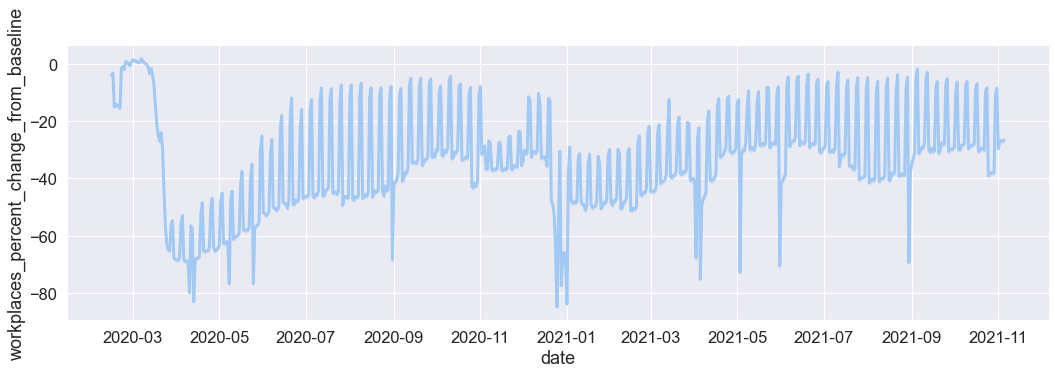

In [14]:
sns.relplot(x = 'date',
            y = 'workplaces_percent_change_from_baseline',
            height = 5, aspect = 3,
            kind = 'line', lw = 3,
            data = mobility_trends_UK)

# Wide and long data format

In the original data, each mobility category is a separate column, which is known as wide data format. Wide data format is easy to read but restricts us to plotting only one mobility category at a time (unless we employ a `for` loop). We can plot all mobility categories simultaneously in `seaborn` after we reshape our data from wide format to long format. Long data format will have one column for all six mobility categories and one column for the values of those categories.

Below is a Pandas schematic of wide (left) and long format data (right):

[Reshaping data](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png" title='Pandas DataFrame' width="600" height="300"/>

Reshaping our mobility categories from wide to long format using the pandas [`melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) function. The function transforms a DataFrame into a format where one or more columns are identifier variables (id_vars), while other columns (value_vars) are turned into a long format, returning columns, ‘variable’ and ‘value’. In our example, id_vars are`country_region` and `date`, and value_vars are the six mobility categories. The `melt` function takes the following parameters:
* `DataFrame` — your pandas DataFrame
* `id_vars` — a list of identifier variables
* `value_vars` — a list of variables to turn into long format

The code below also removes NaN, standing for Not a Number, using the method `dropna()`

:::{tip}

Instead of manually creating a list of all six column labels for the six mobility categories of interest, you can obtain the list by typing in

```
mobility_trends_countries.columns[9:15]
```

where the attribute `columns` returns the column labels of the DataFrame `mobility_trends_countries` and the indices in square brackets [9:15] specify the location of the mobility categories' columns of interest. The command returns the labels in the following format:

```
Index(['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')
```
:::

In [15]:
# From wide to long format using the function melt
mobility_trends_countries_long = pd.melt(mobility_trends_countries, id_vars=['country_region', 'sub_region_1', 'date'], 
# the columns 'date' and 'sub_region_1' are not needed for the box plots below but in case you may need the two variables in subsequent tasks.
                                       value_vars=mobility_trends_countries.columns[9:15]).dropna()

mobility_trends_countries_long

,country_region,sub_region_1,date,variable,value
630,Germany,Baden-Württemberg,2020-02-15,retail_and_recreation_percent_change_from_base...,6.0
631,Germany,Baden-Württemberg,2020-02-16,retail_and_recreation_percent_change_from_base...,23.0
632,Germany,Baden-Württemberg,2020-02-17,retail_and_recreation_percent_change_from_base...,0.0
633,Germany,Baden-Württemberg,2020-02-18,retail_and_recreation_percent_change_from_base...,4.0
634,Germany,Baden-Württemberg,2020-02-19,retail_and_recreation_percent_change_from_base...,2.0
...,...,...,...,...,...
3673629,Sweden,Västra Götaland County,2021-11-01,residential_percent_change_from_baseline,7.0
3673630,Sweden,Västra Götaland County,2021-11-02,residential_percent_change_from_baseline,4.0
3673631,Sweden,Västra Götaland County,2021-11-03,residential_percent_change_from_baseline,5.0
3673632,Sweden,Västra Götaland County,2021-11-04,residential_percent_change_from_baseline,5.0


The resulting DataFrame `mobility_trends_countries_long` contains two new columns: `variable` containing the six mobility categories per country per date, and `value` containing the values of those categories (percent change from baseline).  

# Multi-plot visualisations

To plot the six mobility categories simultaneously in a multi-plot, we simply add the parameter `col` and provide as an argument our categorical variable labeled `variable`. Our six mobility categories will be plotted in a grid of six columns. Setting the `col_wrap` parameter to 2 will plot the six variables in two columns, spanning three rows. We change the kind of plot we would like to draw to [`boxen`](https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot).

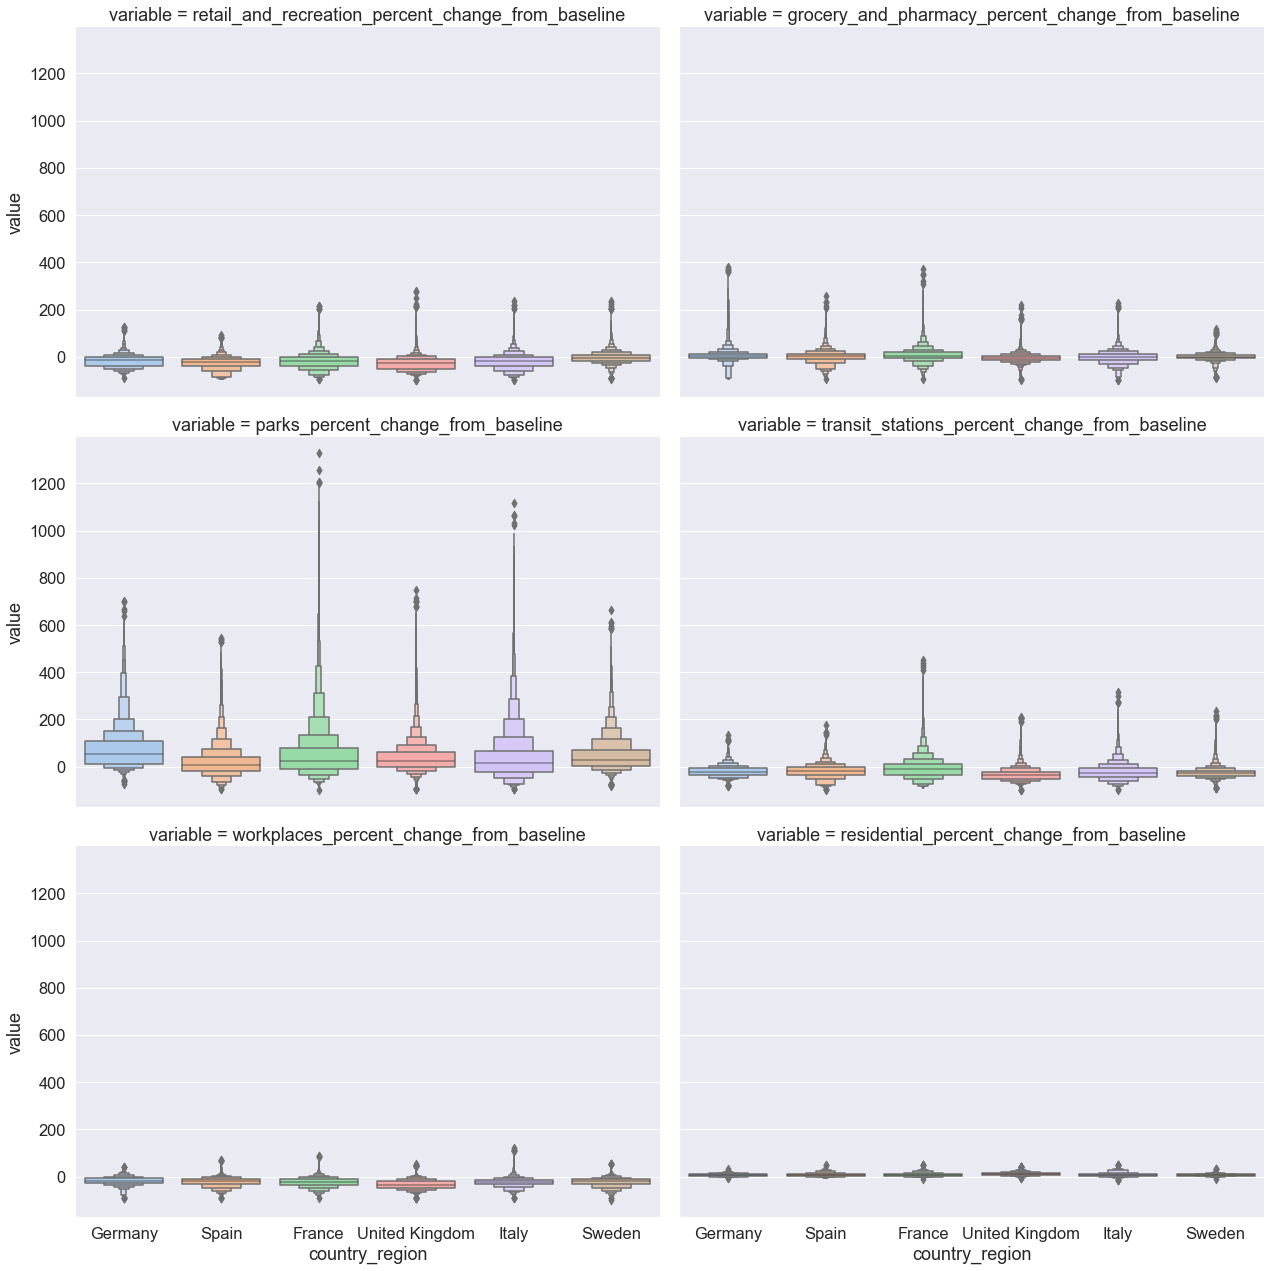

In [16]:
# Differences in multiple mobility trends across selected countries
g = sns.catplot(x="country_region", y="value", col="variable", col_wrap=2, kind="boxen",
                height=6, aspect=1.5, # control plot size
                data=mobility_trends_countries_long)

The plots above have one deficiency — different mobility categories share the same `y` axis. Because the axis range is predominantly determined by one mobility category (parks mobility) and its wide distribution, the plots barely display the way in which the six countries differ with respect to the remaining five mobility category. We resolve this problem by simply setting the parameter `sharey` to False and redrawing the figure.

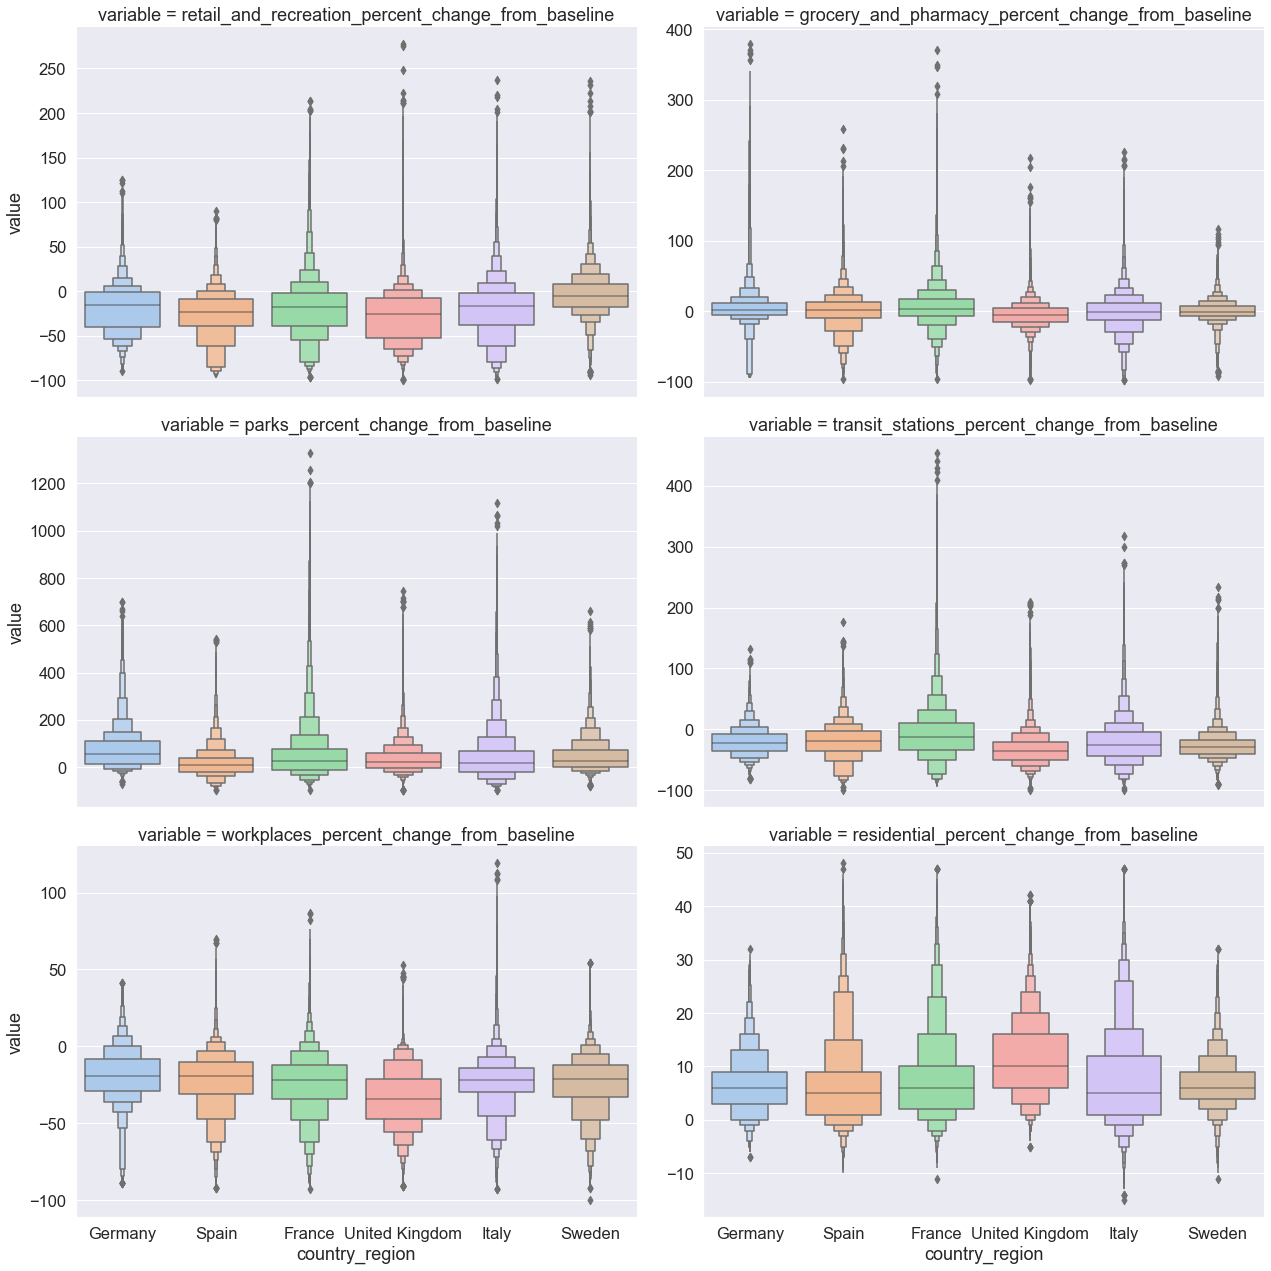

In [17]:
sns.catplot(x="country_region", y="value", col="variable", col_wrap=2, kind="boxen", 
                height=6, aspect=1.5, # control plot size
                sharey=False, # set different y axes for each plot 
                data=mobility_trends_countries_long);

> ## Try on your own—Exercise 2
>
> Visualise mobility categories for a different set of countries of your choice. Employ a different kind of `catplot`, for example `violin`.

---

## Acknowledgements
* Valentin Danchev. 2021. [Reproducible Data Science: Accessible Data Analysis with Open Source Python Tools and Real-World Data.](https://valdanchev.github.io/reproducible-data-science-python/intro.html).   
* Wes McKinney. 2017. Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython.
* Daniel Chen. 2017. Pandas for Everyone: Python Data Analysis.
* Manuel Amunategui. 2020. COVID-19 Community Mobility Reports From Google and Apple - Available to All - Explore with Python. 